# Clustering

In [1]:
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive

# Importing the data and necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [3]:
path = 'After_BERT(Embedded_Data).csv'
df = pd.read_csv(path, index_col = 0, keep_default_na=False)
df.head()

Industry                   Company Location  \
0  Mechanical or Industrial Engineering        Dublin, Ohio, United States   
1   Information Technology and Services    New York City Metropolitan Area   
2   Information Technology and Services   Chicago, Illinois, United States   
3   Information Technology and Services  Bangalore Urban, Karnataka, India   
4   Information Technology and Services           Jaipur, Rajasthan, India   

   New Job (90 Days)  Year Started  \
0              False        2020.0   
1              False        2018.0   
2              False        2018.0   
3              False        2018.0   
4               True        2021.0   

                                    Profile Headline  \
0  Mechanical Design Engineer, System Integration...   
1                    Digital DevOps Engineer at HSBC   
2  Leading Product + UX at Remedy (Two Point Conv...   
3                          Product Designer at udaan   
4  Digital Technology Intern at General Electric ...   

                                     Profile Summary  \
0  In the ever-growing technological world where ...   
1  AWS Certified Cloud Engineer holding 3 AWS Ass...   
2                             http://aroonmathai.com   
3                                                      
4                                                      

                              School Degree Education End           Domain  \
0  Chalmers University of Technology     pg        group2  Arts and Design   
1              Binghamton University     pg        group2  Arts and Design   
2         Carnegie Mellon University     pg        group2  Arts and Design   
3    Vellore Institute of Technology     ug        group2  Arts and Design   
4    Vellore Institute of Technology     ug        group1  Arts and Design   

   ... School_embedding Degree_embedding Education End_embedding  \
0  ...         0.569816        -0.616228               -0.534899   
1  ...         0.259484        -0.616228               -0.534899   
2  ...        -0.367105        -0.616228               -0.534899   
3  ...         0.751344        -0.128450               -0.534899   
4  ...         0.751344        -0.128450               -0.515048   

  Domain_embedding CompanyName_embedding JobTitle_embedding  \
0         0.195954              0.388687           0.142881   
1         0.195954              0.297323           0.092447   
2         0.195954             -0.190701           0.142881   
3         0.195954              0.143441           0.142881   
4         0.195954             -0.285993          -0.308086   

   My Network_embedding  Country_embedding  Continent_embedding  \
0             -0.345625           0.217775             0.208209   
1             -0.345625           0.217775             0.208209   
2             -0.345625           0.217775             0.208209   
3             -0.345625          -0.156677            -0.227953   
4             -0.345625          -0.156677            -0.227953   

   FieldOfStudy_embedding  
0                0.661440  
1               -0.594768  
2               -0.594768  
3               -0.594768  
4               -0.594768  

[5 rows x 30 columns]

In [4]:
coords = pd.read_csv('Coordinates.csv')
coords.head()

latitude  longitude
0  40.099229 -83.114077
1  44.870970  -0.547490
2  41.875562 -87.624421
3  12.945142  77.553645
4  26.915458  75.818982

In [5]:
df['latitude'] = coords['latitude']
df['longitude'] = coords['longitude']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4910 entries, 0 to 4909
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Industry                    4910 non-null   object 
 1   Company Location            4910 non-null   object 
 2   New Job (90 Days)           4910 non-null   bool   
 3   Year Started                4910 non-null   float64
 4   Profile Headline            4910 non-null   object 
 5   Profile Summary             4910 non-null   object 
 6   School                      4910 non-null   object 
 7   Degree                      4910 non-null   object 
 8   Education End               4910 non-null   object 
 9   Domain                      4910 non-null   object 
 10  CompanyName                 4910 non-null   object 
 11  JobTitle                    4910 non-null   object 
 12  My Network                  4910 non-null   object 
 13  Country                     4910 

In [7]:
df.columns

Index(['Industry', 'Company Location', 'New Job (90 Days)', 'Year Started',
       'Profile Headline', 'Profile Summary', 'School', 'Degree',
       'Education End', 'Domain', 'CompanyName', 'JobTitle', 'My Network',
       'Country', 'Continent', 'FieldOfStudy', 'Industry_embedding',
       'Company Location_embedding', 'Profile Headline_embedding',
       'Profile Summary_embedding', 'School_embedding', 'Degree_embedding',
       'Education End_embedding', 'Domain_embedding', 'CompanyName_embedding',
       'JobTitle_embedding', 'My Network_embedding', 'Country_embedding',
       'Continent_embedding', 'FieldOfStudy_embedding', 'latitude',
       'longitude'],
      dtype='object')

In [8]:
df1 = df[['Country_embedding',
          'Continent_embedding',
          'Domain_embedding',
          'Industry_embedding',
          'FieldOfStudy_embedding',
          'latitude', 'longitude']]

# Standardisation and Normalisation of Data

In [9]:
# Standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df1)

In [10]:
# Normalizing the Data 
from sklearn.preprocessing import normalize
normalized_df = normalize(scaled_df)

In [11]:
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df)

# Using Elbow Method to determine the best value of k in KMeans clustering

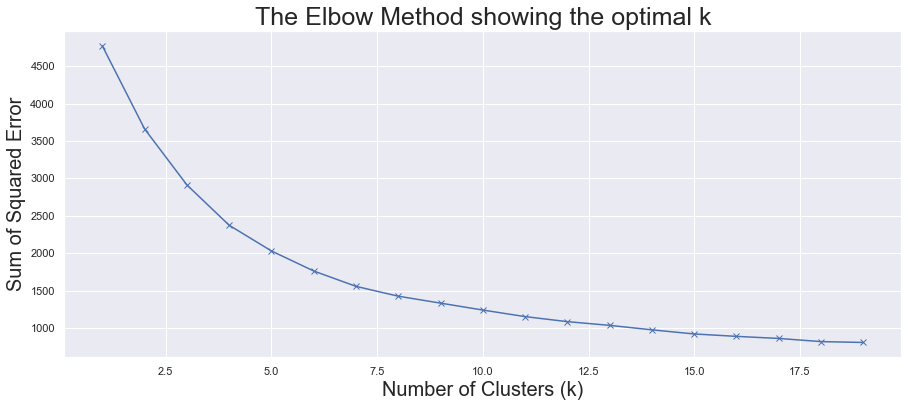

In [12]:
from sklearn.cluster import KMeans

sse = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(normalized_df)
    sse.append(kmeanModel.inertia_)
plt.figure(figsize=(15,6))
plt.plot(K, sse, 'bx-')
plt.xlabel('Number of Clusters (k)', fontsize = 20)
plt.ylabel('Sum of Squared Error', fontsize = 20)
plt.title('The Elbow Method showing the optimal k', fontsize = 25)
plt.show()

Here we see that there is no appropriate value of k. Thus we use DBSCAN method to cluster data. 

# Visualising the data using PCA 

In [13]:
# Reducing the dimensions of the data 
from sklearn.decomposition import PCA
pca = PCA(n_components = 3) 
pcadf = pca.fit_transform(normalized_df) 
pcadf = pd.DataFrame(pcadf) 
pcadf.columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3'] 
  
pcadf.head(10)

Principal Component 1  Principal Component 2  Principal Component 3
0               0.375353              -0.061732               0.885181
1              -0.285591              -0.137249               0.815803
2              -0.244175              -0.140513               0.851572
3              -0.840738              -0.028420              -0.292160
4              -0.872485              -0.068228               0.046006
5               0.373151               0.525823              -0.481568
6              -0.840738              -0.028420              -0.292160
7               0.297989              -0.033309               0.666742
8               0.820311               0.211774              -0.202186
9               0.871196               0.125964              -0.024124

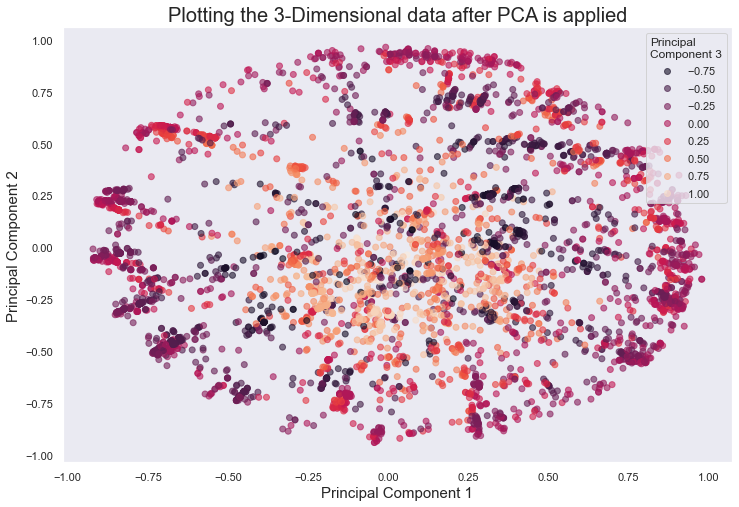

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(pcadf['Principal Component 1'],
                     pcadf['Principal Component 2'], 
                     c = pcadf['Principal Component 3'],
                     alpha=0.6)
plt.title('Plotting the 3-Dimensional data after PCA is applied', fontsize = 20)
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.legend(*scatter.legend_elements(), loc="best", title="Principal\nComponent 3")
ax.plot([])
ax.grid()
plt.show()

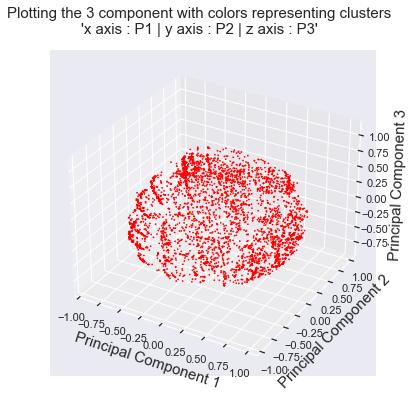

In [15]:
fig = plt.figure(figsize = (15, 6))
plt.suptitle("Plotting the 3 component with colors representing clusters\n'x axis : P1 | y axis : P2 | z axis : P3'", fontsize = 15)
             
x, s1 = pcadf['Principal Component 1'], "Principal Component 1"
y, s2 = pcadf['Principal Component 2'], "Principal Component 2"
z, s3 = pcadf['Principal Component 3'], "Principal Component 3"

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, c = "red", s=0.5, alpha = 1)
ax.set_xlabel(s1, fontsize = 15)
ax.set_ylabel(s2, fontsize = 15)
ax.set_zlabel(s3, fontsize = 15)

plt.show()

In [16]:
import plotly as py
import plotly.graph_objs as go
import numpy as np
import pandas as pd

trace = go.Scatter3d(
    x=pcadf['Principal Component 1'],
    y=pcadf['Principal Component 2'],
    z=pcadf['Principal Component 3'],

    mode='markers',
    marker=dict(
        size=5,
        color=pcadf['Principal Component 3'],
        colorscale='Viridis',   
    ),
    name= 'PCA Visualization',

    # list comprehension to add text on hover
    text= [f"PCA 1: {a}<br>PCA 2: {b}<br>PCA 3: {c}" for a,b,c in list(zip(pcadf['Principal Component 1'], pcadf['Principal Component 2'], pcadf['Principal Component 3']))],
    # if you do not want to display x,y,z
    hoverinfo='text'
)


layout = dict(title = 'PCA Visualization',)

data = [trace]
fig = dict(data=data, layout=layout)

py.offline.plot(fig, filename = 'Test.html')

'Test.html'

Since there are no distinguishable clusters, we go for DBSCAN clustering and Heirarchial Clustering algorithms

# DBSCAN Clustering (World)

In [17]:
# df1 = df[['Country_embedding',
#           'Continent_embedding',
#           'Domain_embedding',
#           'Industry_embedding',
#           'FieldOfStudy_embedding',
#           'latitude', 'longitude']]

In [18]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(df1.drop(['latitude', 'longitude'], axis = 1))
labels = db.labels_
print(labels, len(labels))

[0 1 1 ... 2 2 2] 4910


In [19]:
df1['label'] = labels
df1['label'].value_counts()

 2    4341
 1     204
 0     204
-1     118
 3      17
 4      16
 5      10
Name: label, dtype: int64

In [20]:
print("Cluster types: ",set(labels))

Cluster types:  {0, 1, 2, 3, 4, 5, -1}


In [21]:
df1.sample(5)

Country_embedding  Continent_embedding  Domain_embedding  \
1161          -0.156677            -0.227953         -0.112251   
206           -0.156677            -0.227953          0.195954   
3847           0.812406            -0.227953          0.116207   
2046          -0.156677            -0.227953          0.484690   
3864          -0.156677            -0.227953          0.116207   

      Industry_embedding  FieldOfStudy_embedding   latitude  longitude  label  
1161            0.394512               -0.184750  10.525626  76.213254      2  
206             0.026966               -0.594768  22.720362  75.868200      2  
3847            0.389670                0.661440  25.624262  42.352833     -1  
2046           -0.245237               -0.594768  28.464615  77.029919      2  
3864           -0.245237                0.661440  30.733442  76.779714      2

# Evaluation Metrics

### Silhouette Score

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_coeff = silhouette_score(df1, labels, metric='euclidean')
print("Silhoutte Score: ", sil_coeff)

Silhoutte Score:  0.6633363585442195


# Plotting the world-wide profile clusters

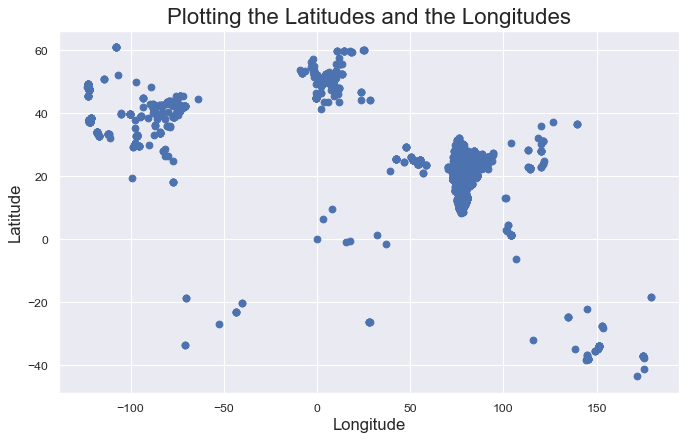

In [25]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(x=df1['longitude'], y=df1['latitude'])
plt.title('Plotting the Latitudes and the Longitudes', fontsize = 20)
plt.xlabel('Longitude', fontsize = 15)
plt.ylabel('Latitude', fontsize = 15)
plt.show()

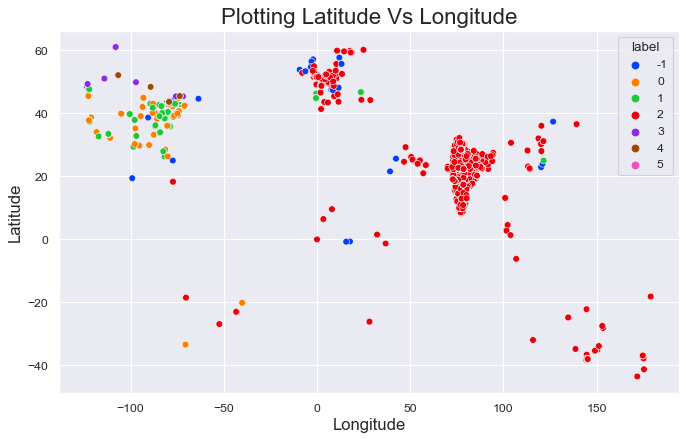

In [26]:
#markers=['.',',','o','v','^','<','>','1','2','3','4','8']
import seaborn as sns
sns.set_theme(color_codes=True)
fig, ax = plt.subplots(figsize = (10, 6),dpi=80)
markers=['o','v','^','<', 'x', '.', ',']
sns.scatterplot(ax = ax , x = "longitude" , y = "latitude" , data = df1, hue = "label", palette = "bright")
ax.set_xlabel( "Longitude" , size = 15)
ax.set_ylabel( "Latitude" , size = 15)
ax.set_title( "Plotting Latitude Vs Longitude" , size = 20)
plt.show()

In [27]:
import plotly.io as pio; pio.renderers.default='notebook'
import plotly.express as px
import pandas as pd
fig = px.scatter_geo(df1,lat='latitude',lon='longitude', hover_name="label", color = df1.label)
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

In [52]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(india_df['longitude'], df['latitude'])]
gdf = GeoDataFrame(india_df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)

# Word Clouds 

In [29]:
df.columns

Index(['Industry', 'Company Location', 'New Job (90 Days)', 'Year Started',
       'Profile Headline', 'Profile Summary', 'School', 'Degree',
       'Education End', 'Domain', 'CompanyName', 'JobTitle', 'My Network',
       'Country', 'Continent', 'FieldOfStudy', 'Industry_embedding',
       'Company Location_embedding', 'Profile Headline_embedding',
       'Profile Summary_embedding', 'School_embedding', 'Degree_embedding',
       'Education End_embedding', 'Domain_embedding', 'CompanyName_embedding',
       'JobTitle_embedding', 'My Network_embedding', 'Country_embedding',
       'Continent_embedding', 'FieldOfStudy_embedding', 'latitude',
       'longitude'],
      dtype='object')

In [30]:
word_cloud_df = df[['Industry', 
        'Degree',
        'Domain', 
        'CompanyName', 
        'JobTitle', 
        'FieldOfStudy']]

In [31]:
word_cloud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4910 entries, 0 to 4909
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Industry      4910 non-null   object
 1   Degree        4910 non-null   object
 2   Domain        4910 non-null   object
 3   CompanyName   4910 non-null   object
 4   JobTitle      4910 non-null   object
 5   FieldOfStudy  4910 non-null   object
dtypes: object(6)
memory usage: 268.5+ KB


In [32]:
def join_text(df):
    k = ""
    for col in df.columns:
        try:
            k = (' '.join(df[col].str.lower())) 
        except:
            print(col)
    return k

In [33]:
word_cloud_df['label'] = labels
word_cloud_df['label'].value_counts()

 2    4341
 1     204
 0     204
-1     118
 3      17
 4      16
 5      10
Name: label, dtype: int64

In [34]:
clus1_df = word_cloud_df[word_cloud_df['label'] == -1]

In [35]:
def plot_wordCloud(df):
    from textblob import TextBlob
    from collections import Counter
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt

    k = join_text(df.drop(['label'], axis = 1))
    wordcloud = WordCloud(width = 2000, height = 1000, prefer_horizontal = 0.3).generate(k)
    plt.figure(figsize=(15,15))
    plt.imshow(wordcloud)
    plt.axis('off')

In [36]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
stopwords = STOPWORDS
stopwords.add('&')
stopwords.add('-')

def analyse_word_cloud(df, num):
    all_words = join_text(df)

    filtered_words = [word for word in all_words.split() if word not in stopwords]
    counted_words = collections.Counter(filtered_words)

    words = []
    counts = []
    for letter, count in counted_words.most_common(10):
        words.append(letter)
        counts.append(count)

    colors = cm.rainbow(np.linspace(0, 1, 10))
    rcParams['figure.figsize'] = 20, 10
    plt.title('Top words in the cluster (' + str(num) + ') vs their count', fontsize = 25)
    plt.xlabel('Count', fontsize = 20)
    plt.ylabel('Words', fontsize = 20)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.barh(words, counts, color=colors)
    plt.show()

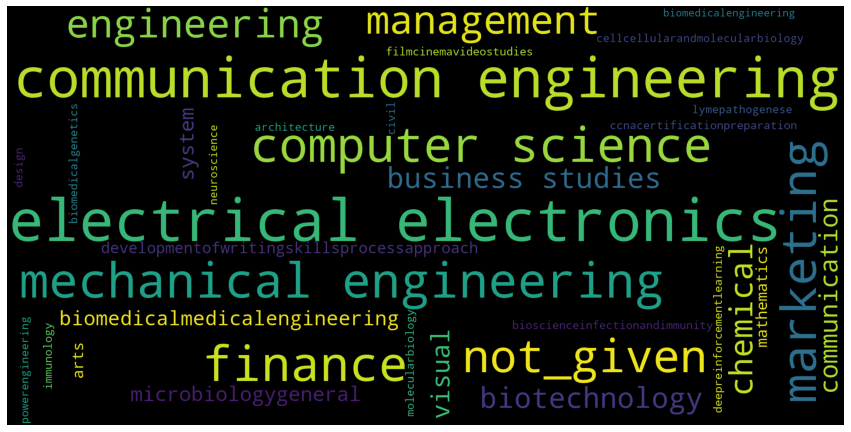

In [37]:
plot_wordCloud(clus1_df)

label


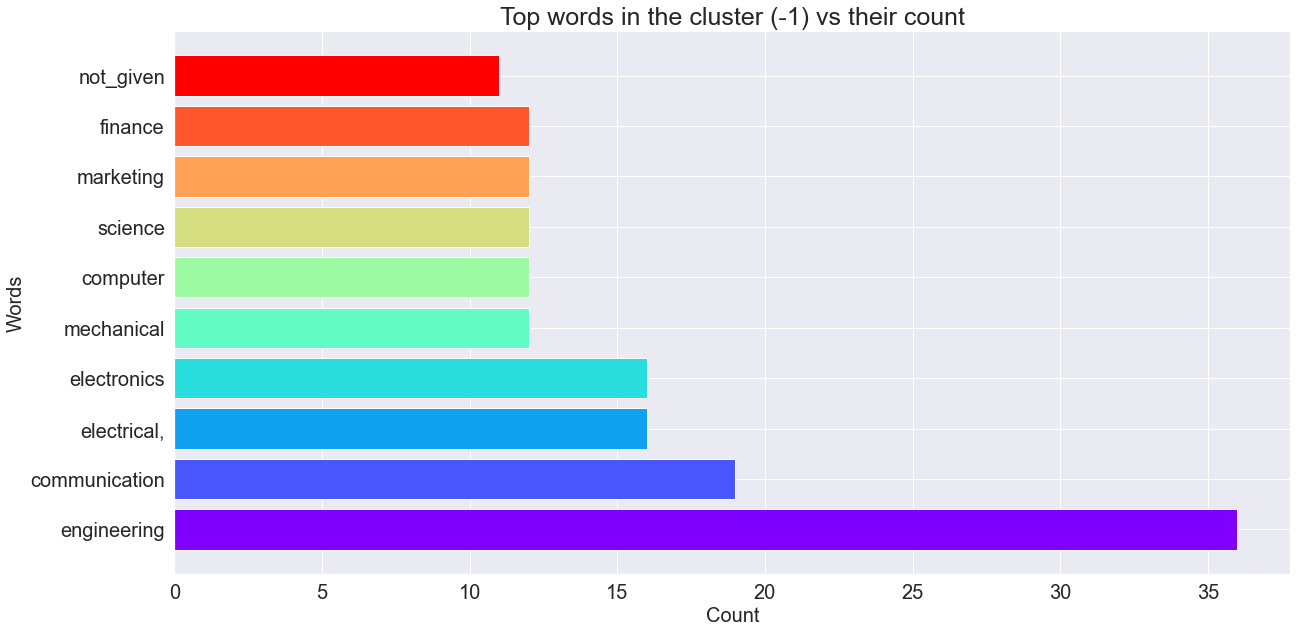

In [38]:
analyse_word_cloud(clus1_df, -1)

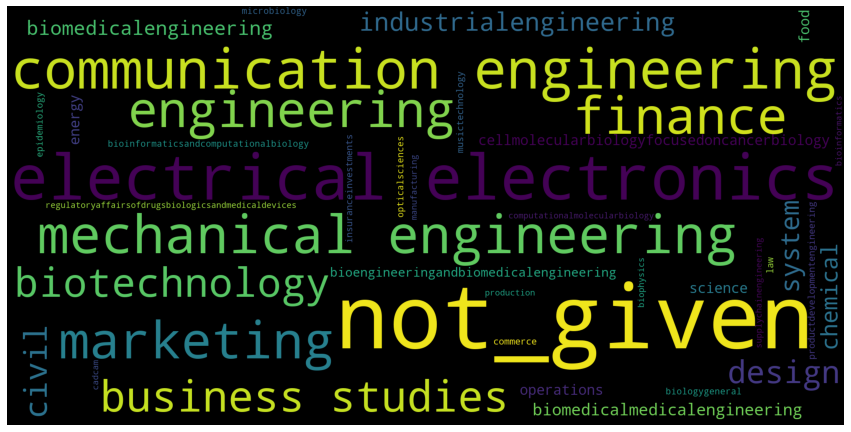

In [39]:
clus2_df = word_cloud_df[word_cloud_df['label'] == 0]
plot_wordCloud(clus2_df)

label


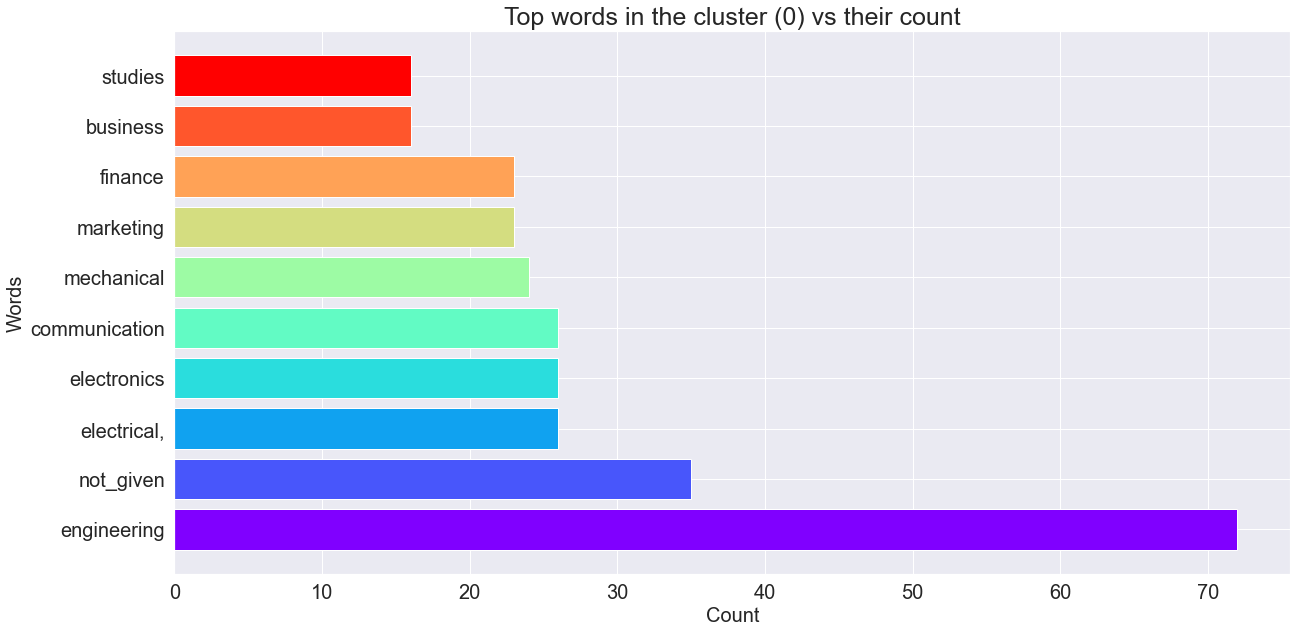

In [40]:
analyse_word_cloud(clus2_df, 0)

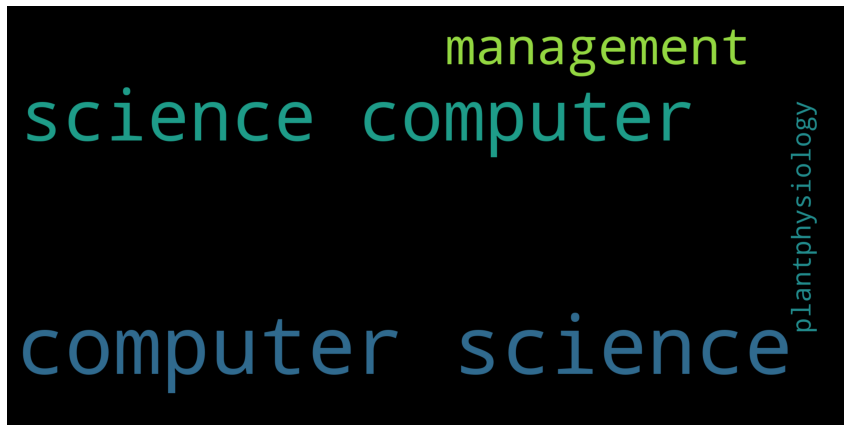

In [41]:
clus3_df = word_cloud_df[word_cloud_df['label'] == 1]
plot_wordCloud(clus3_df)

label


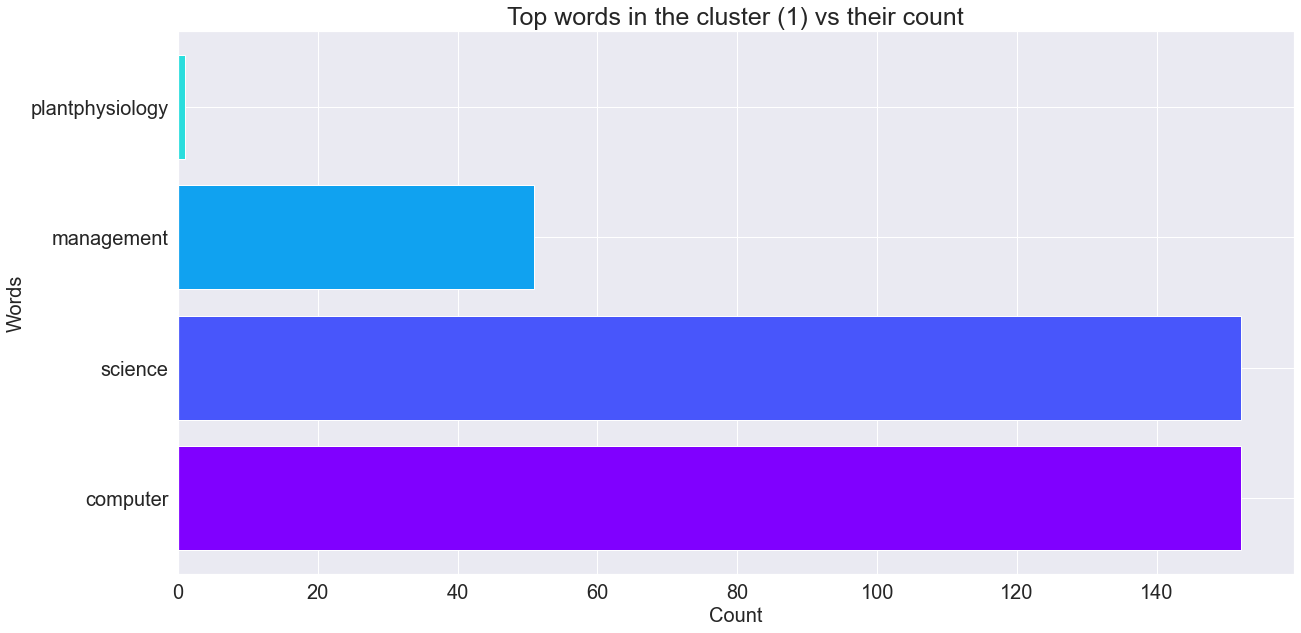

In [42]:
analyse_word_cloud(clus3_df, 1)

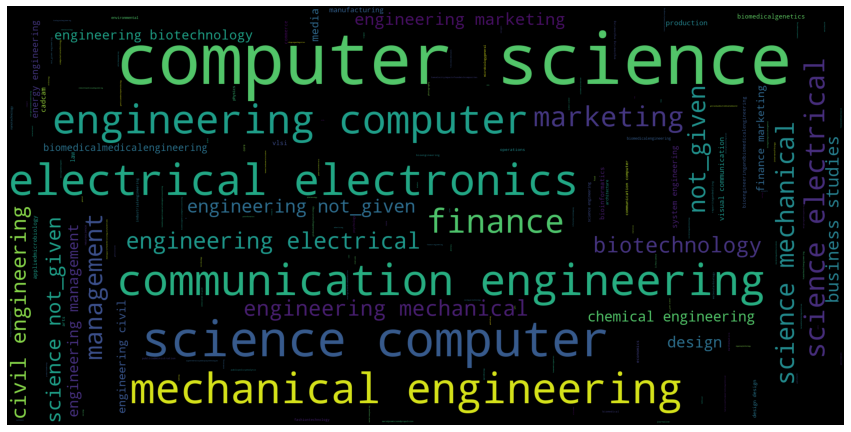

In [43]:
clus4_df = word_cloud_df[word_cloud_df['label'] == 2]
plot_wordCloud(clus4_df)

label


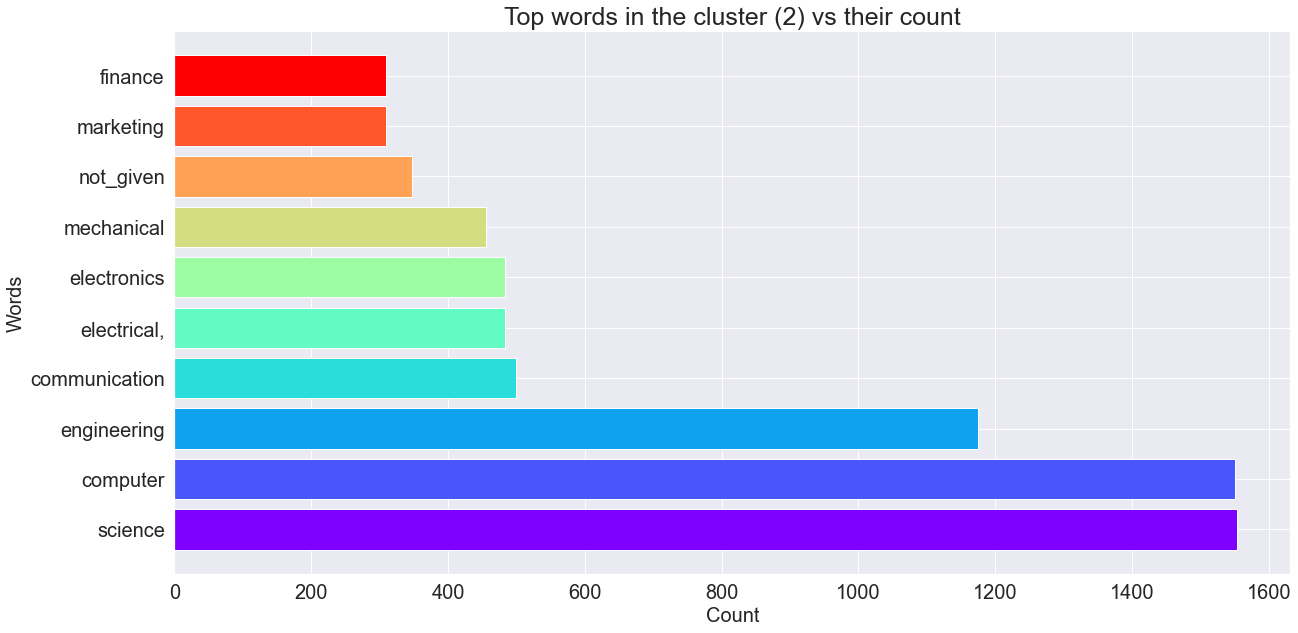

In [44]:
analyse_word_cloud(clus4_df, 2)

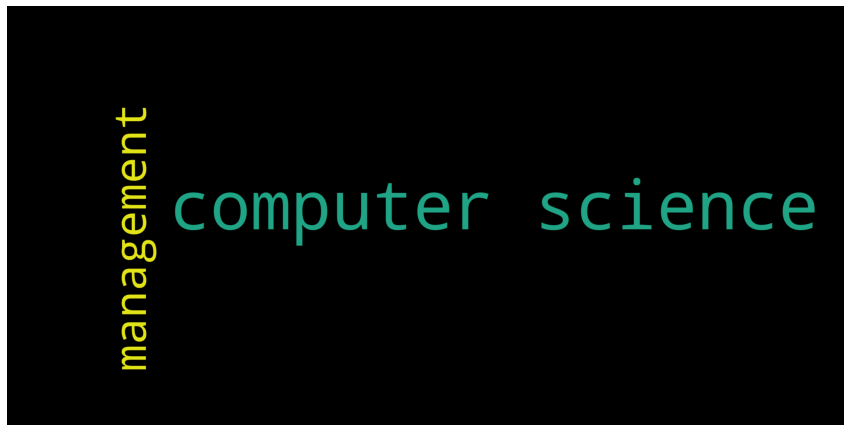

In [45]:
clus5_df = word_cloud_df[word_cloud_df['label'] == 3]
plot_wordCloud(clus5_df)

label


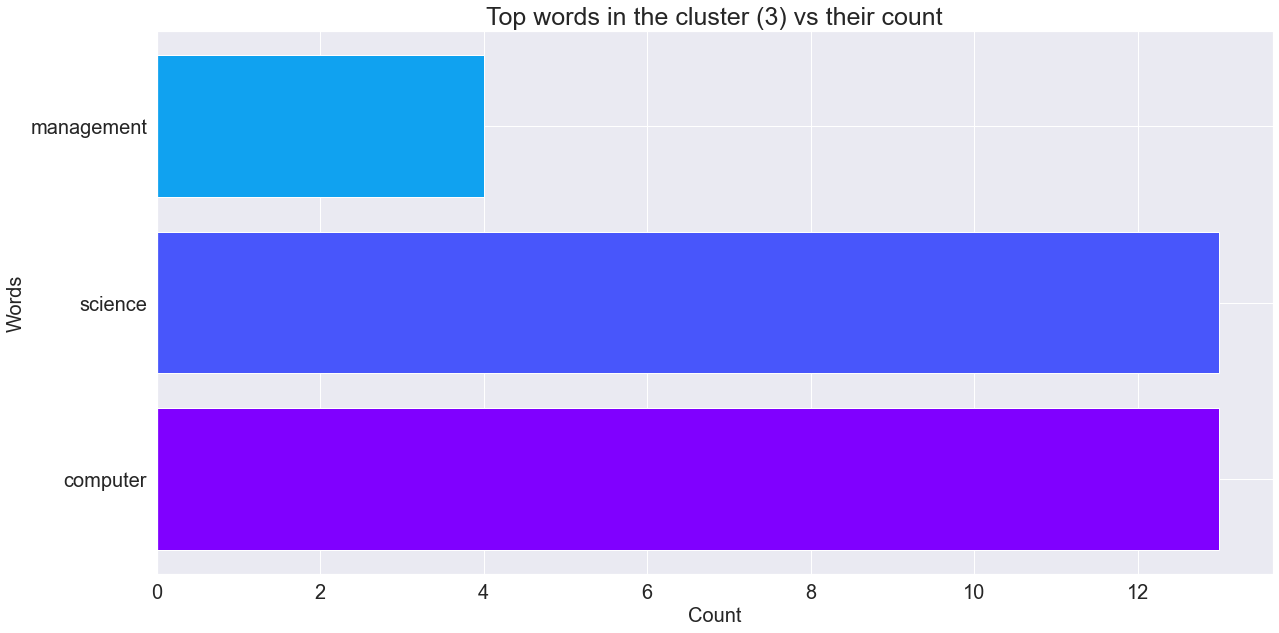

In [46]:
analyse_word_cloud(clus5_df, 3)

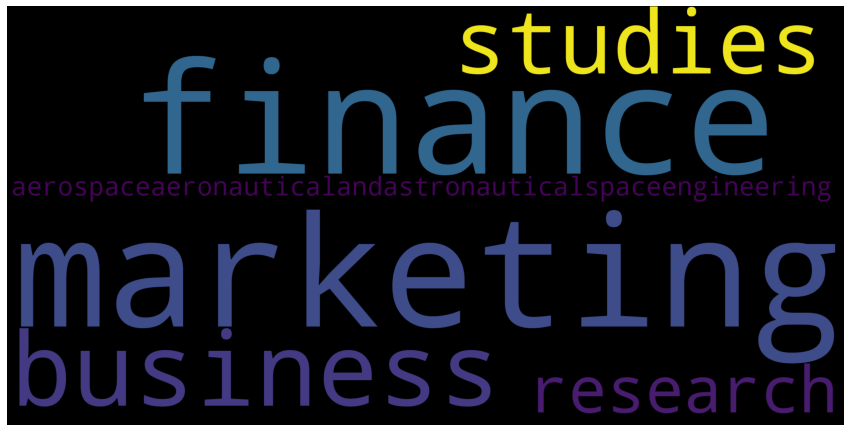

In [47]:
clus6_df = word_cloud_df[word_cloud_df['label'] == 4]
plot_wordCloud(clus6_df)

label


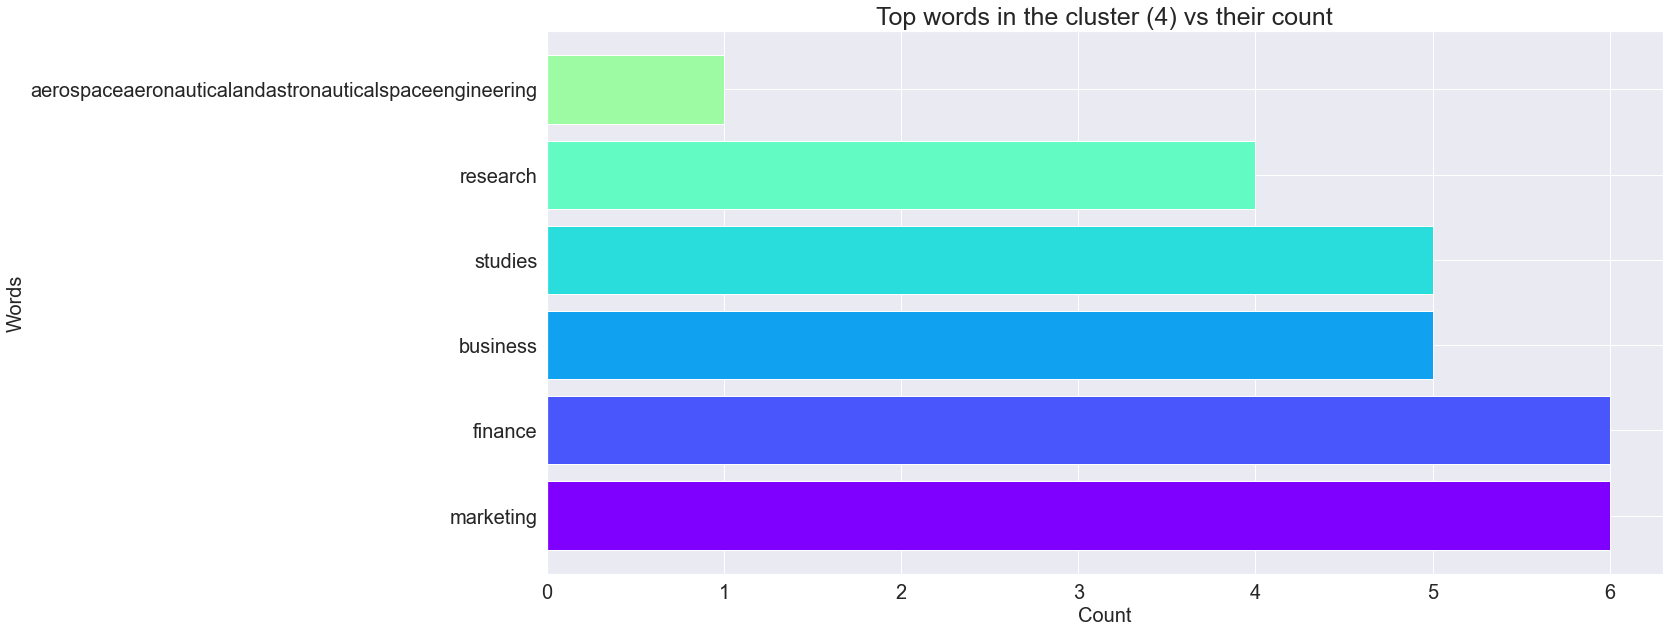

In [48]:
analyse_word_cloud(clus6_df, 4)

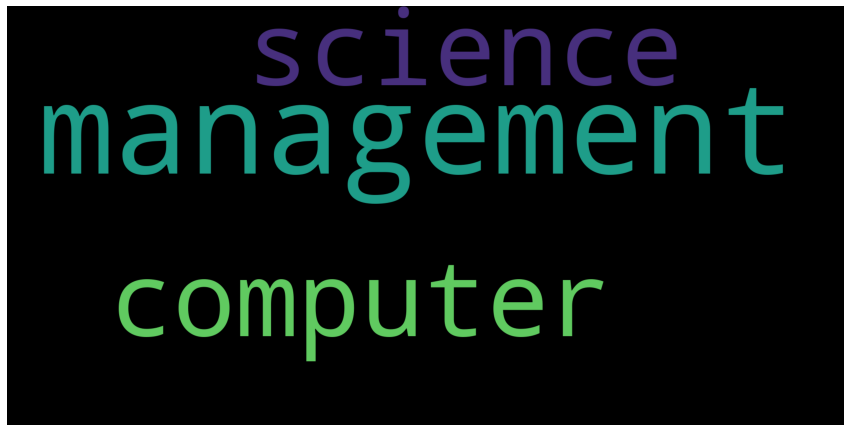

In [49]:
clus7_df = word_cloud_df[word_cloud_df['label'] == 5]
plot_wordCloud(clus7_df)

label


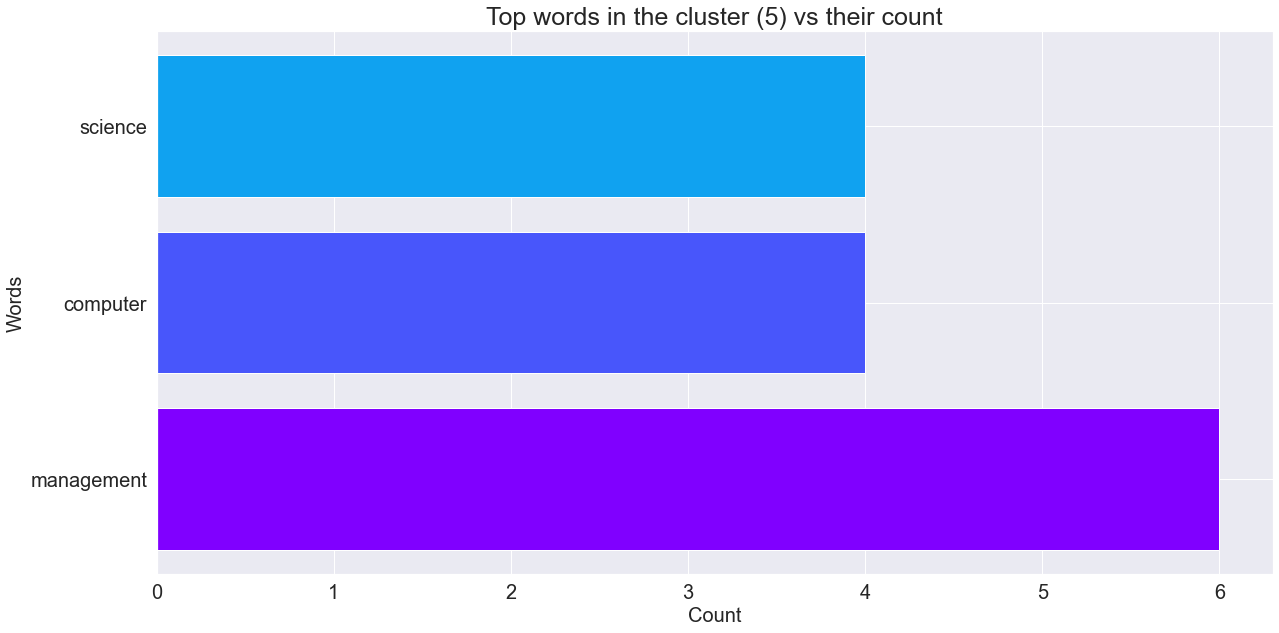

In [50]:
analyse_word_cloud(clus7_df, 5)